## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 10 : Algoritma Hierarki </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [103]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Ragil Muhamad Ramadhan"
myNIM = "58511"

In [104]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Start: 		2023-11-15 15:49:22.123932
Device ID: 	df15be1c-8393-11ee-b119-e2bea1734fd9



---

### Dataset yang dipakai:

1. [Laptop Price Dataset] – sumber : [https://www.kaggle.com/datasets/mohidabdulrehman/laptop-price-dataset]
2. [Student Alcohol Consumption] – sumber : [https://www.kaggle.com/datasets/uciml/student-alcohol-consumption]

---

### Hasil kerja

#### Importing system library

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('./ML_Jaya/laptop_data.csv')
df.shape

(1303, 12)

In [107]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [109]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [110]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [111]:
numerical = ['Inches', 'Price']
categorical = ['Company', 'TypeName', 'ScreenResolution', 'OpSys']
unused = ['Unnamed: 0', 'Cpu', 'Ram', 'Memory', 'Weight']

In [112]:
df = df.drop(columns=unused)
df.shape

(1303, 7)

In [113]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [114]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Gpu                 0
OpSys               0
Price               0
dtype: int64

C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

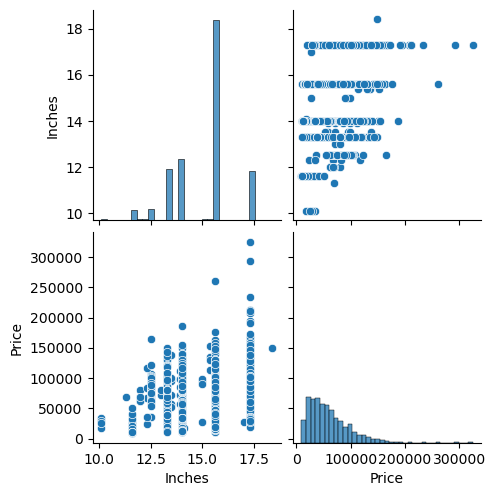

In [115]:
sns.pairplot(df)

C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

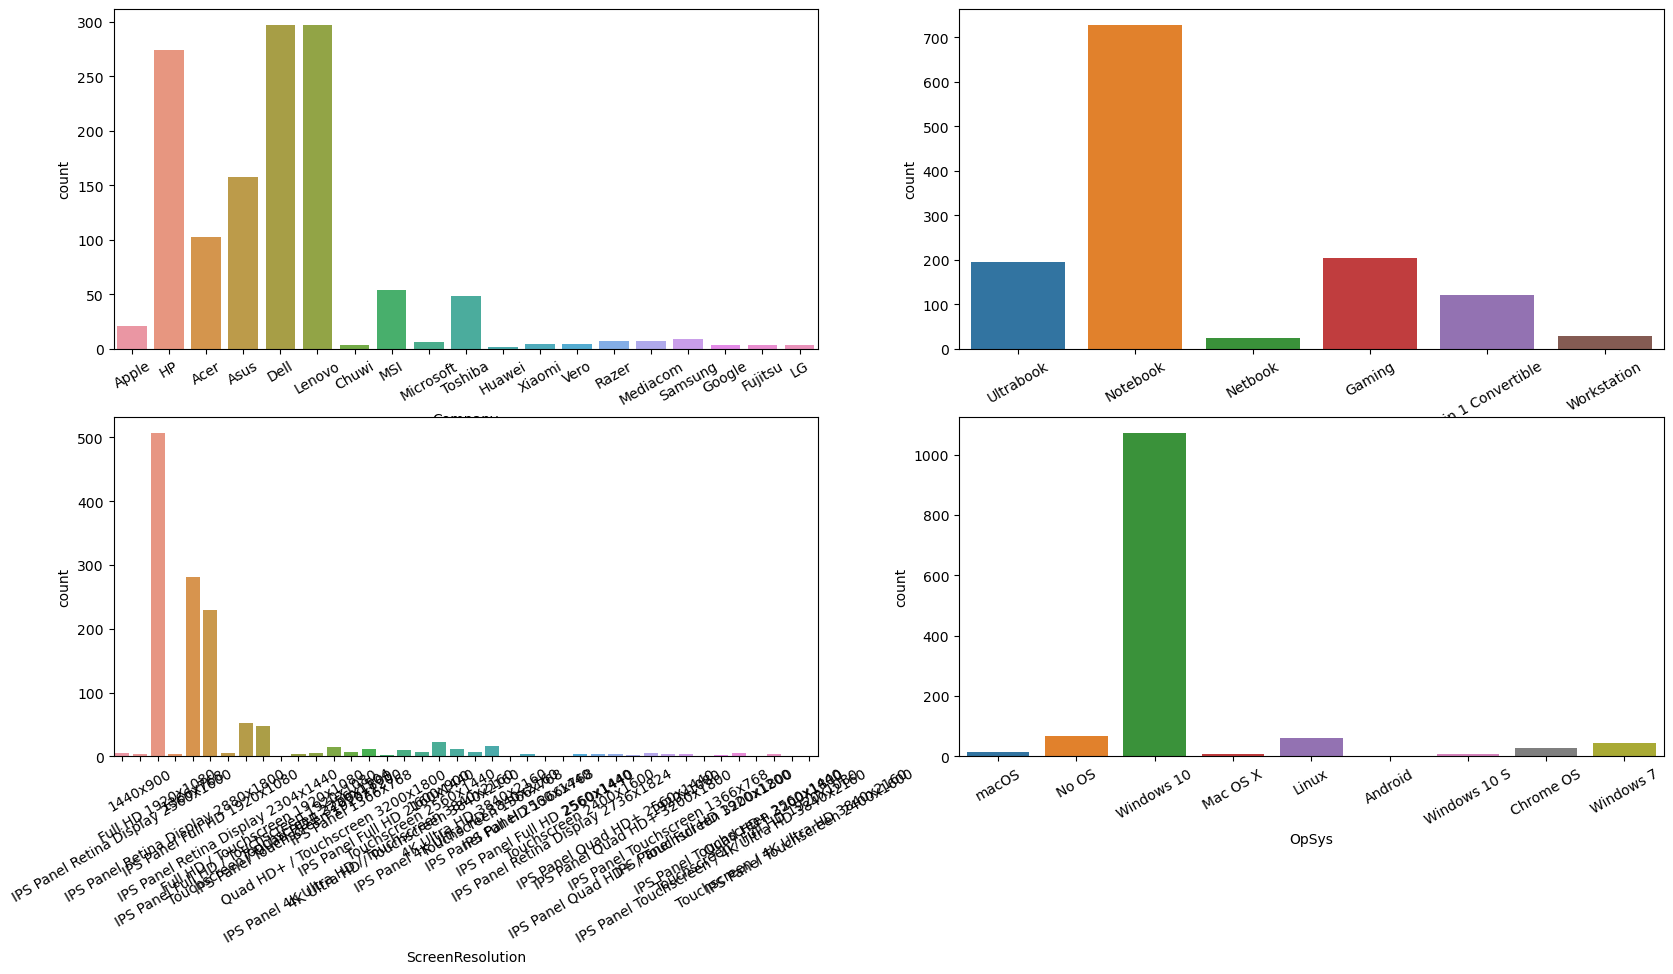

In [116]:
fig = plt.figure(figsize=(20, 15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(x=cat, data=df)
    plt.xticks(rotation=30)
plt.show()

<Axes: >

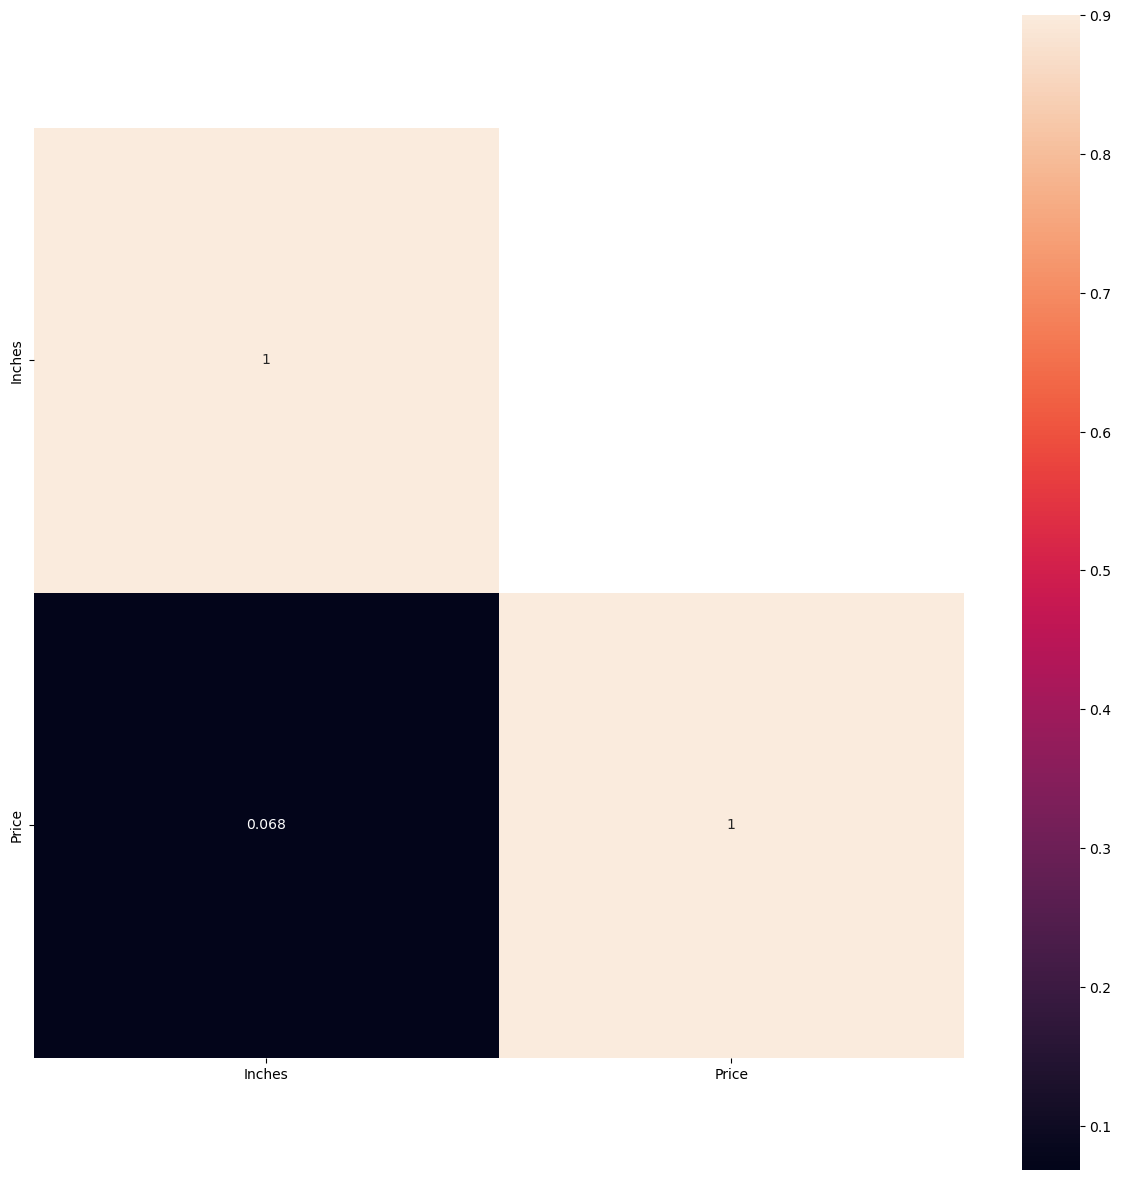

In [117]:
#create correlation
corr = df[numerical].corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repettitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(15, 12))
fig.set_size_inches(15, 15)
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)

In [119]:
df_cluster = pd.DataFrame()
df_cluster['Inches'] = df['Inches']
df_cluster['Price'] = df['Price']
df_cluster.head()

,Inches,Price
0,13.3,71378.6832
1,13.3,47895.5232
2,15.6,30636.0000
3,15.4,135195.3360
4,13.3,96095.8080


C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


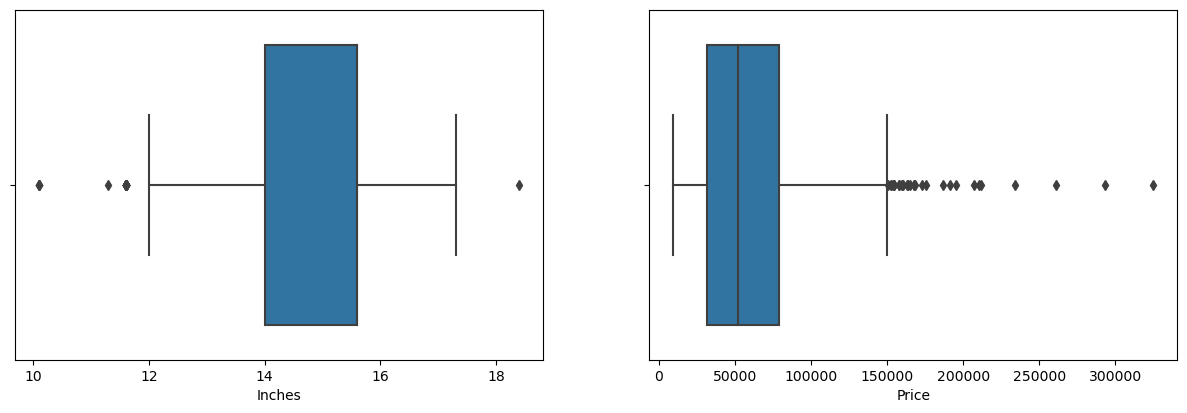

In [120]:
fig = plt.figure(figsize=(15, 10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is

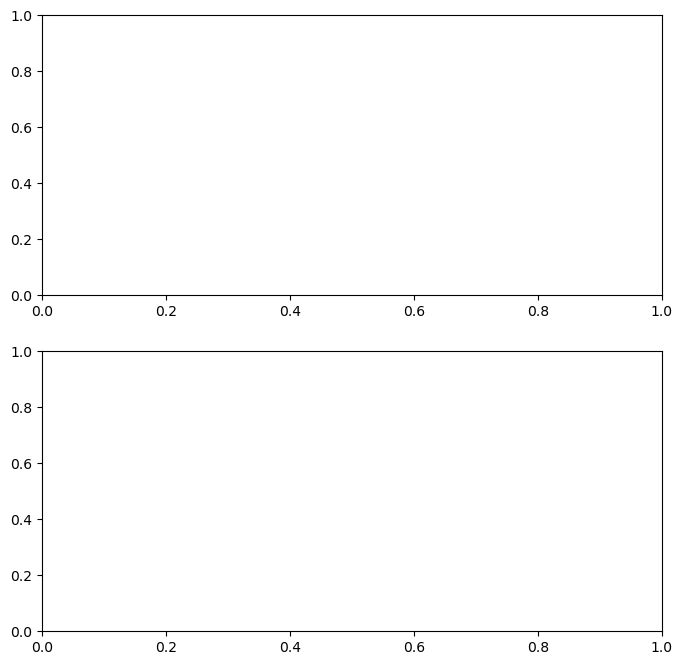

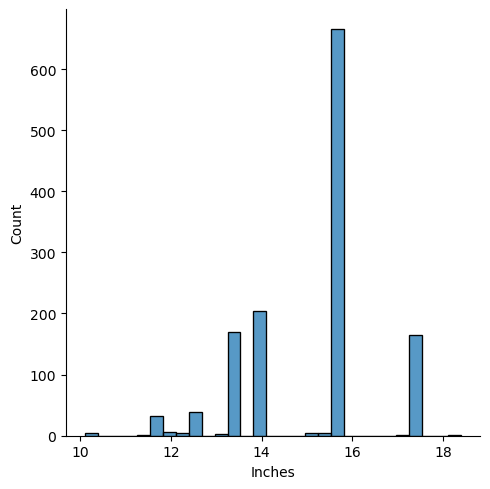

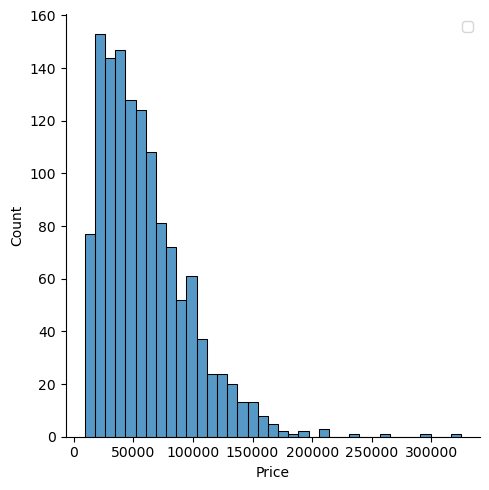

In [125]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
sns.displot(df['Inches'], ax=ax1)
sns.displot(df['Price'], ax=ax2)
plt.tight_layout()
plt.legend()

C:\Users\ragil\AppData\Local\Temp\ipykernel_12116\795676087.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cluster_log['Inches'], ax=ax1)
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

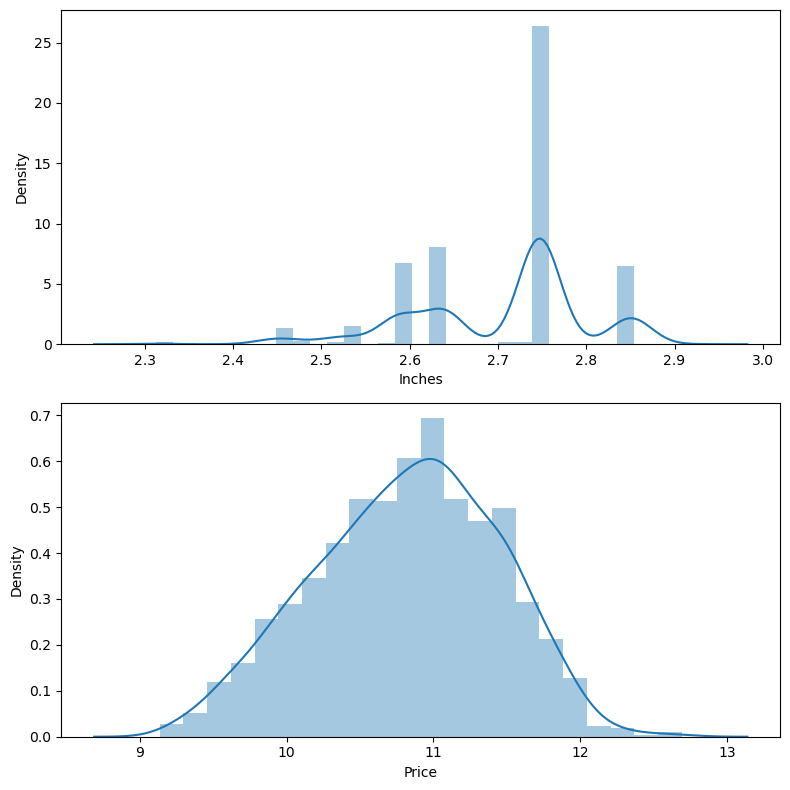

In [126]:
df_cluster_log = np.log(df_cluster[['Inches', 'Price']])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
sns.distplot(df_cluster_log['Inches'], ax=ax1)
sns.distplot(df_cluster_log['Price'], ax=ax2)
plt.tight_layout()

In [127]:
df_cluster_log.head()

,Inches,Price
0,2.587764,11.175755
1,2.587764,10.776777
2,2.747271,10.329931
3,2.734368,11.814476
4,2.587764,11.473101


In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

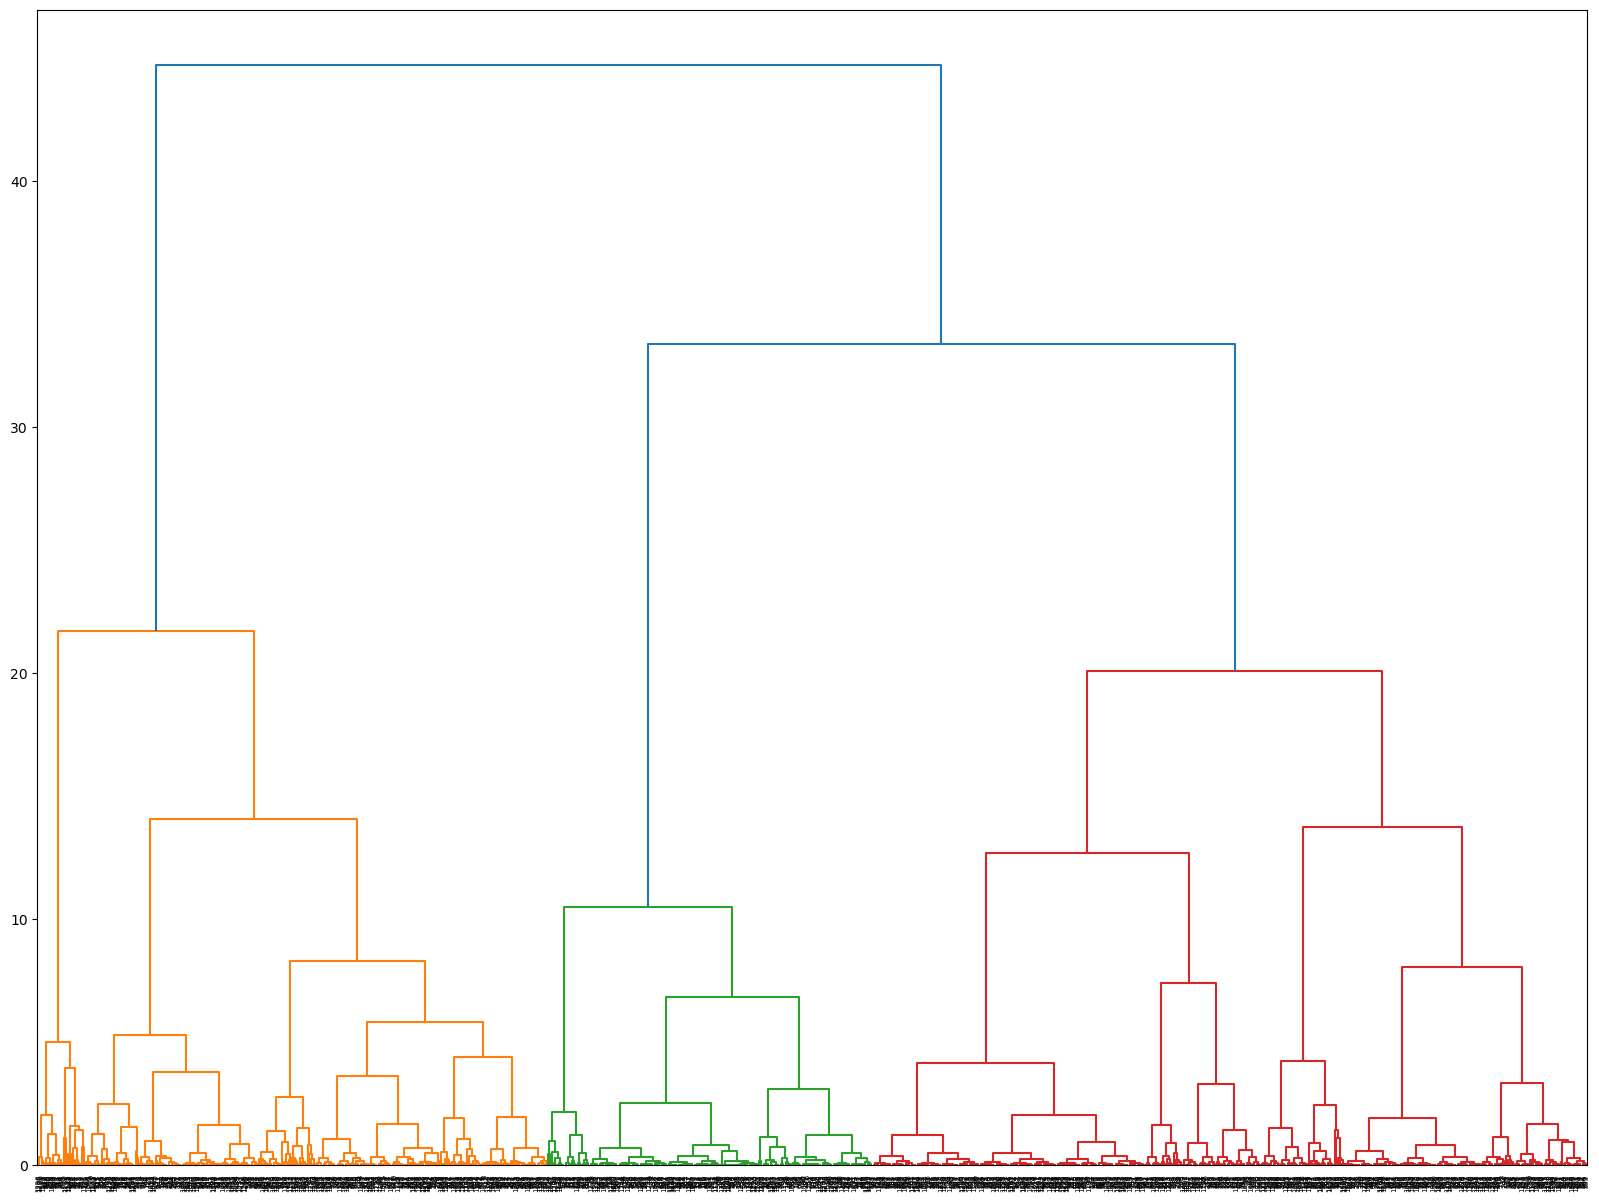

In [129]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


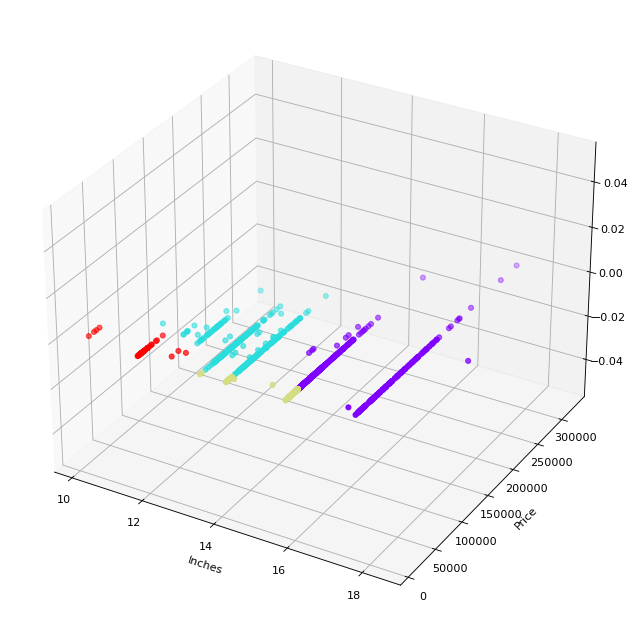

In [131]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.scatter3D(df_cluster['Inches'], df_cluster['Price'], c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Inches', linespacing=3.2)
yLabel = ax.set_ylabel('Price', linespacing=3.1)
print("Hierarchical Agglomerative Clustering")

In [132]:
df_cluster_hac = df_cluster.assign(Cluster = hac_labels)
grouped_hac = df_cluster_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Inches,Price
Cluster,,
0,16.1,69856.0
1,13.5,74406.4
2,15.4,22674.5
3,11.5,22323.7


In [133]:
# The Dendogram using WholesaleCustomer dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
data = pd.read_csv('./studentAlcohol/student-mat.csv')
data = data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout']]
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout
0,18,4,4,2,2,0,4,3,4
1,17,1,1,1,2,0,5,3,3
2,15,1,1,1,2,3,4,3,2
3,15,4,2,1,3,0,3,2,2
4,16,3,3,1,2,0,4,3,2


In [137]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout
0,0.894427,0.198762,0.198762,0.099381,0.099381,0.000000,0.198762,0.149071,0.198762
1,0.923313,0.054313,0.054313,0.054313,0.108625,0.000000,0.271563,0.162938,0.162938
2,0.912871,0.060858,0.060858,0.060858,0.121716,0.182574,0.243432,0.182574,0.121716
3,0.909509,0.242536,0.121268,0.060634,0.181902,0.000000,0.181902,0.121268,0.121268
4,0.911685,0.170941,0.170941,0.056980,0.113961,0.000000,0.227921,0.170941,0.113961


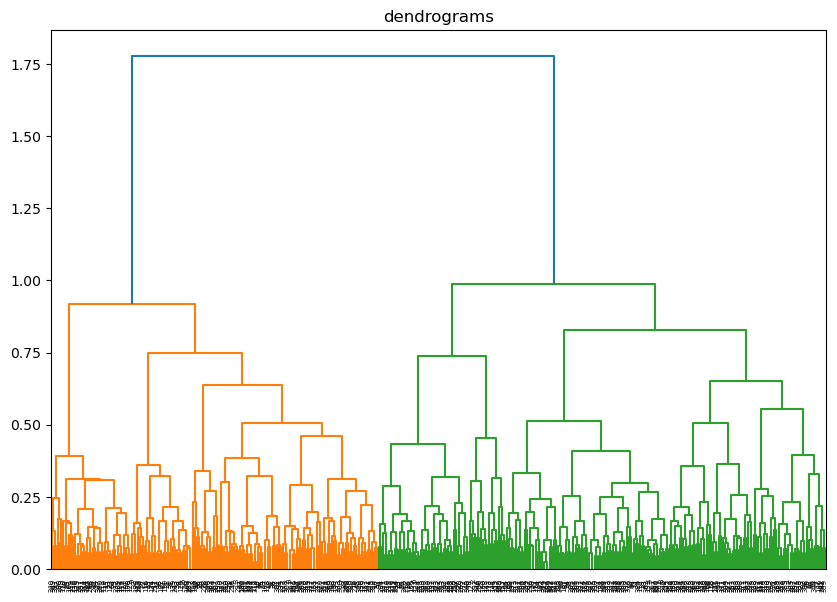

In [138]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

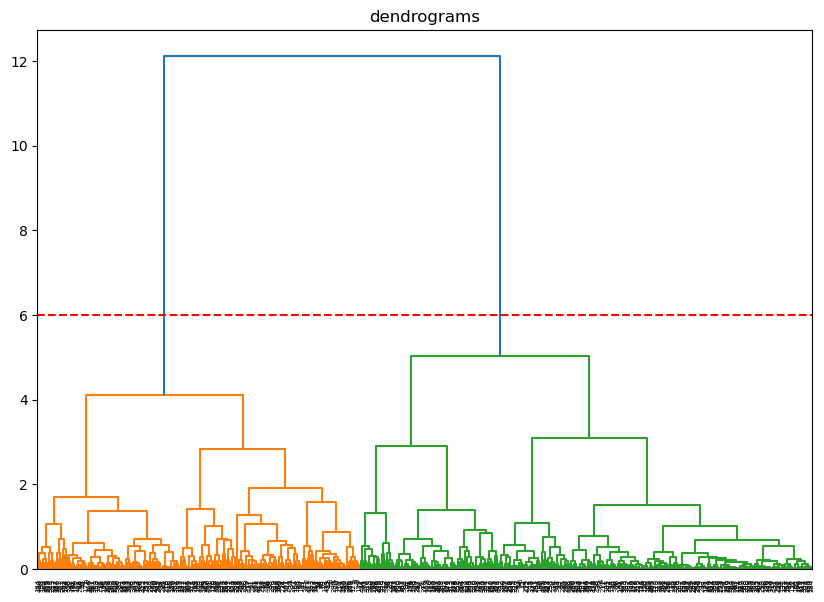

In [86]:
plt.figure(figsize=(10, 7))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [139]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

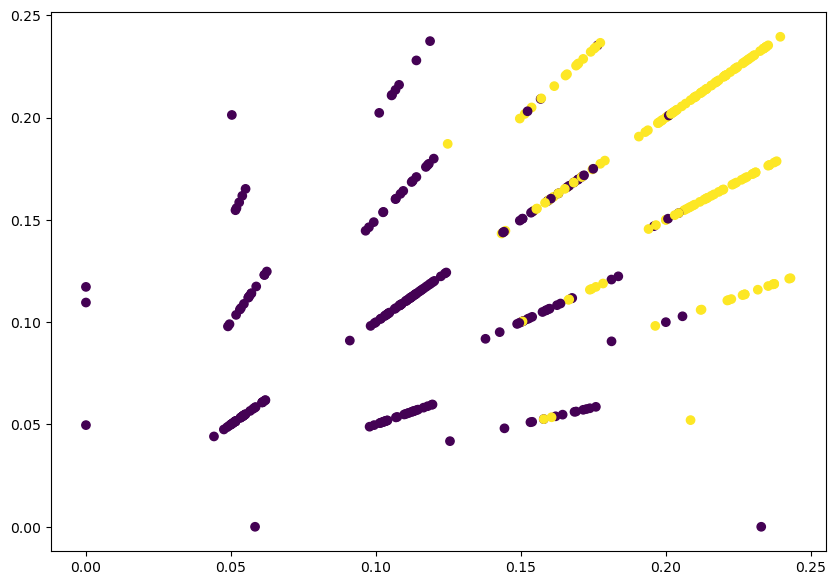

In [140]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Medu'], data_scaled['Fedu'], c=cluster.labels_)

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada dataset1 dilakukan heatmap uuntuk mengukur nilai korelasi antara fiture inch dan price. Didapatkan nilai korelasi yang sangat rendah yaitu 0.068. Dengan begitu dapat dinyatakan bahwa hubungan antara kedua fitur tersebut sangat jauh.
    - Dendogram yang dilakukan pada dataset2 menunjukan clustering child yang sangat beragam. Keberagaman terjadi karena banyak sekali data yang terkandung dalam dataset. Nilai 0 dan 1 pada dataset2 didominasi oleh angka 0, namun tidak terlalu jauh perbedaannya. Dengan begitu dapat disimpulkan bahwa korelasi antara fitur pada dataset2 tidak terlalu kuat.
    -

---

In [3]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Moeljono Widjaja
NIM: 		123456
Time-stamp:	2023-02-12 10:08:53.642099


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [141]:
!jupyter nbconvert --to html "./IF540_EL_Laporan_10_58511_RagilMuhamadRamadhan.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_EL_Laporan_10_58511_RagilMuhamadRamadhan.ipynb to html
[NbConvertApp] Writing 1541959 bytes to IF540_EL_Laporan_10_58511_RagilMuhamadRamadhan.html
